In [1]:
#Pandas para el tratamiento de DataFrames
import pandas as pd
#Se importa para graficar información
import matplotlib.pyplot as plt
#Se usa para mostrar las gráficas
%matplotlib inline

In [2]:
data = pd.read_csv('uber-raw-data-apr14.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [4]:
cant = 1000
datos = data.head(cant)
X = datos.copy()

In [5]:
# Eliminar las columnas de Date y Base
X.drop(['Date/Time', 'Base'], # Drop para elimiar filas o columnas
       axis=1, inplace=True) # inplace=true utiliza el mismo dataframe

In [6]:
# Verificar la existencia de nulos
X.isnull().sum() #isnull: función que verifica la existencia de valores nulos

Lat    0
Lon    0
dtype: int64

In [7]:
cols = X.columns # Obtener los valordes de la columnas del data frame
cols

Index(['Lat', 'Lon'], dtype='object')

In [8]:
# Utilizamos el módulo preprocessing para importar la función MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler() # Objeto ms guarda la función
X = ms.fit_transform(X) # Aplica la función a los datos X

In [9]:
X = pd.DataFrame(X, columns=[cols])

In [10]:
X.head()

,Lat,Lon
0,0.425126,0.465193
1,0.313014,0.385577
2,0.326001,0.432787
3,0.398092,0.442488
4,0.399682,0.447890


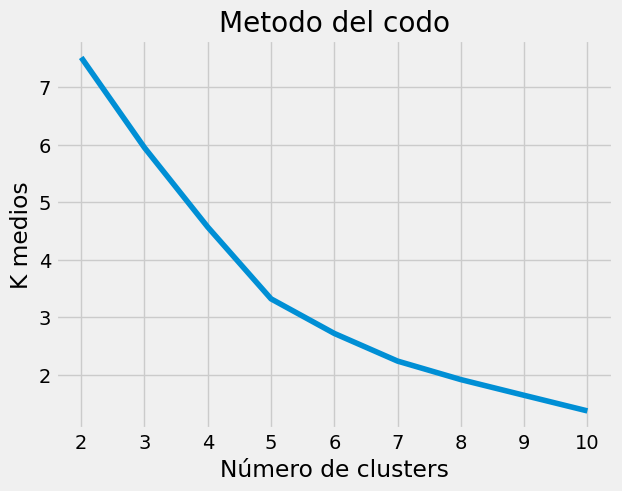

In [25]:
from sklearn.cluster import KMeans # Importa la función KMeans del módulo cluster
cs = [] #cs: es un objeto tipo lista vacío
for i in range (2,11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    max_iter = 300,
                    n_init = 10,
                    random_state = 0)
    kmeans.fit(X.values)
    cs.append(kmeans.inertia_)
plt.plot(range(2,11),cs)
plt.title('Metodo del codo')
plt.xlabel('Número de clusters')
plt.ylabel('K medios')
plt.show()


In [12]:
# Se calcula la pendiente en cada uno de los valores
diff = []
for i in range(len(cs)-1):
    # Las diferencias deben ser positivas. La gráfica es decreciente
    #El orden de esta diferencia se hace izquieda menos derecha
    diff.append(cs[i]-cs[i+1])
print(diff)

# Se calcula el mayor cambio en las pendientes, lo que identifica el codo
maxi = 0
posMax = -1
# Se recorre la lista de diferencia de pendientes
for d in range(len(diff)-1):
    dif = diff[d]-diff[d+1]
    print("La diferencia en ", d + 3, " es ", dif)
    if dif > maxi:
        maxi = dif
        posMax = d + 3
print("La cantidad de clusters debe ser: ", posMax)

[1.565873542085198, 1.3787855974549617, 1.245277083997101, 0.6005507208292191, 0.4801717841217119, 0.3210291924861195, 0.27278185552268885, 0.27070286829198564]
La diferencia en  3  es  0.18708794463023626
La diferencia en  4  es  0.13350851345786063
La diferencia en  5  es  0.6447263631678819
La diferencia en  6  es  0.12037893670750721
La diferencia en  7  es  0.1591425916355924
La diferencia en  8  es  0.04824733696343064
La diferencia en  9  es  0.002078987230703211
La cantidad de clusters debe ser:  5


In [13]:
from sklearn.metrics import silhouette_score

2
3
4
5
6


Text(0.5, 1.0, 'Silouette para data Uber')

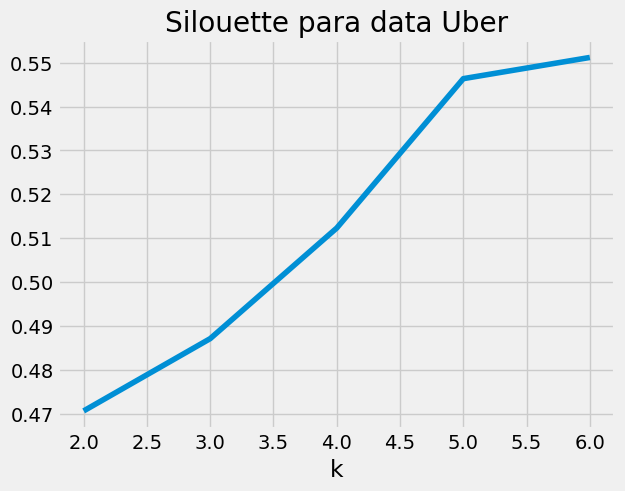

In [26]:
sil = []
for i in range (2,7):
    print(i)
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    max_iter = 300,
                    n_init = 10,
                    random_state = 0)
    sil.append(silhouette_score(X.values, 
                                kmeans.fit_predict(X.values)))
plt.plot(range(2,7), sil)
plt.xlabel("k")
plt.title("Silouette para data Uber")

In [15]:
# Se calcula la pendiente en cada uno de los valores
diff = []
for i in range(len(sil)-1):
    # Las diferencias deben ser positivas. La gráfica es decreciente
    #El orden de esta diferencia se hace izquieda menos derecha
    diff.append(sil[i+1]-sil[i])
print(diff)

# Se calcula el mayor cambio en las pendientes, lo que identifica el codo
maxi = 0
posMax = -1
# Se recorre la lista de diferencia de pendientes
for d in range(len(diff)-1):
    dif = diff[d]-diff[d+1]
    print("La diferencia en ", d + 3, " es ", dif)
    if dif > maxi:
        maxi = dif
        posMax = d + 3
print("La cantidad de clusters debe ser: ", posMax)

[0.016445690087119713, 0.025159451780864428, 0.03397765978257039, 0.0048224827858749375]
La diferencia en  3  es  -0.008713761693744715
La diferencia en  4  es  -0.008818208001705963
La diferencia en  5  es  0.029155176996695453
La cantidad de clusters debe ser:  5


In [16]:
km = KMeans(n_clusters = posMax, # k óptiomo calculado desde el arreglo
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)
y_means = km.fit_predict(X.values)
# Los valores de X
x=X.values

In [17]:
y_means

array([1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 2, 1, 2, 1, 1,
       3, 2, 0, 4, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 1, 3, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 4, 1, 2, 0, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 4, 1, 1, 2, 1, 1, 2, 2, 1, 2, 4, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       4, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 4, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 4, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 3, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1,
       0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 4, 4, 1,

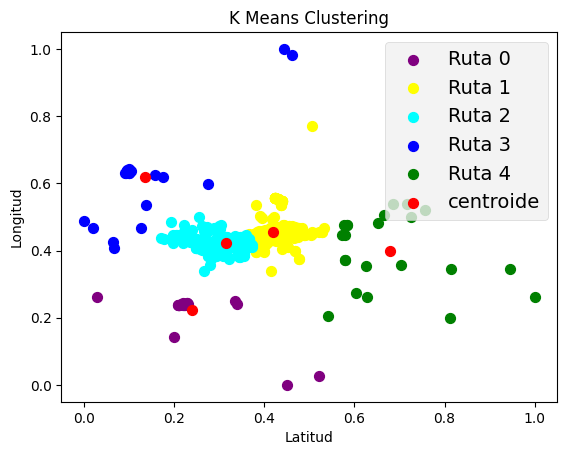

In [18]:
listaColores = ['purple','yellow','cyan','blue','green']
for ruta in range(posMax):
    # Máscara para filtrar las filtas por cluster
    mascara = y_means == ruta
    # Se agrega a la gráfica la información del cluster
    plt.scatter(x[mascara,0], x[mascara,1], s=50, c = listaColores[ruta], label = f'Ruta {ruta}')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=50, c='red', label='centroide')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize=12)
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.legend()

plt.show()

In [19]:
# Perfilamiento
cl_k_means = pd.DataFrame(y_means, columns=["cluster_kmeans"])
cl_k_means.head()

,cluster_kmeans
0,1
1,2
2,2
3,1
4,1


In [20]:
datosCluster = pd.concat([datos, cl_k_means], axis=1)
datosCluster.head()

,Date/Time,Lat,Lon,Base,cluster_kmeans
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,1
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,1
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,1


In [21]:
datosCluster["cluster_kmeans"].value_counts()

cluster_kmeans
1    520
2    405
0     31
3     22
4     22
Name: count, dtype: int64